In [1]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

mypathE                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_5/Results/5A/EulerN104.txt"
mypathV                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_5/Results/5A/VerletN104.txt"






def read_files(path):  
    
    x, y, z = [],[],[]
    vx, vy, vz = [],[],[]
    t = []
    
    
    with open(path, 'r') as infile:
        lines = infile.readlines()[2:]
        for line in lines:

            line = line.split()
            t.append(float(line[0]))
            x.append(float(line[1]))
            y.append(float(line[2]))
            z.append(float(line[3]))
            vx.append(float(line[4]))
            vy.append(float(line[5]))
            vz.append(float(line[6]))
    
    r = np.zeros((len(x), 3))
    v = np.zeros((len(x), 3))
    for i in range(len(x)):
        r[i] = [x[i], y[i], z[i]]
        v[i] = [vx[i], vy[i], vz[i]]
        
    return t, r, v

tE, rE, vE = read_files(mypathE)
tV, rV, vV = read_files(mypathV)
#plt.plot(x,y)

In [2]:
c1 = 'firebrick'
c2 = 'steelblue'
c3 = 'plum'
c4 = 'seagreen'
c5 = 'orange'



(-1.25, 1.25)

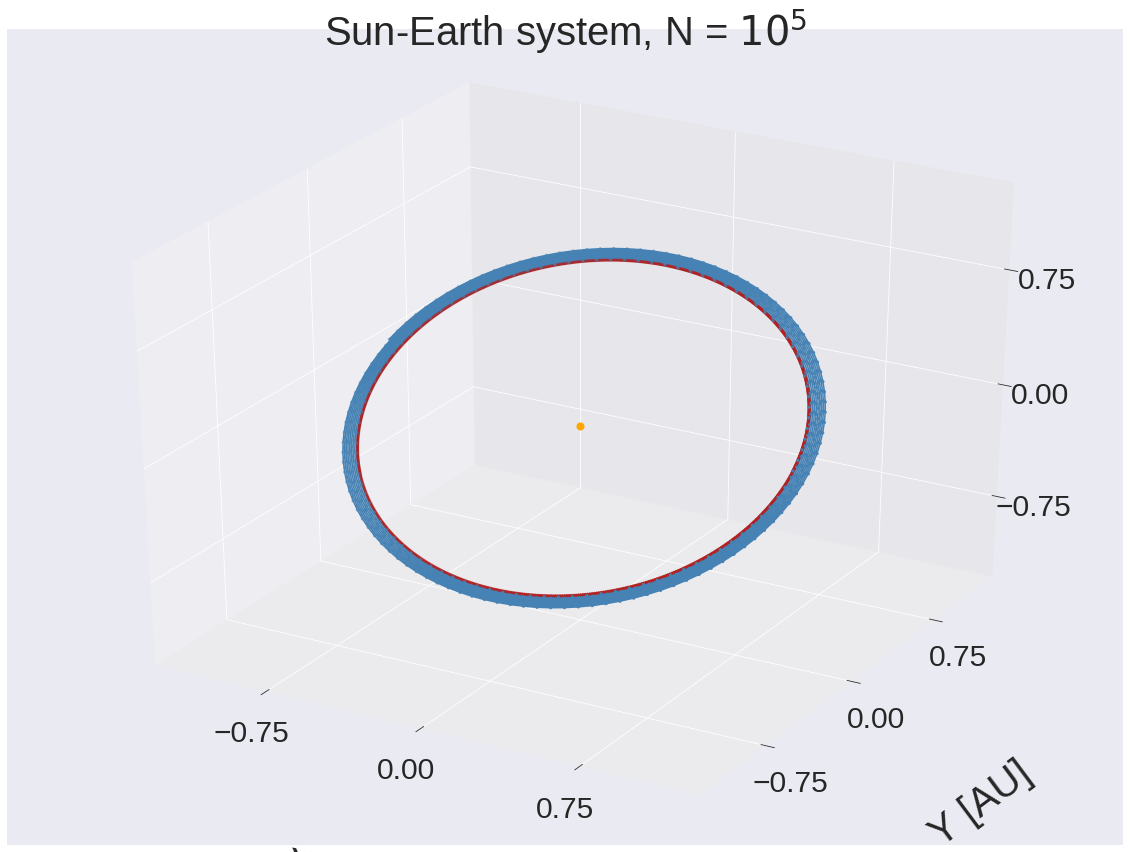

In [6]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.colors

fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')

fsize = 40


ax.scatter3D(0,0,0, s = 50, c = 'orange', label = 'The sun')

ax.scatter3D(rE[:,0], rE[:,1], rE[:,2], marker = '.', c= 'steelblue', label = 'Euler', linestyle = '-');
ax.scatter3D(rV[:,0], rV[:,1], rV[:,2], marker = '.', c= c1, label = 'Verlet', linestyle = '-');
ax.plot3D(rV[:,0], rV[:,1], rV[:,2], c = c1)
ax.plot3D(rE[:,0], rE[:,1], rE[:,2], 'steelblue')



plt.title('Sun-Earth system, N = $10^5$', pad = 50, fontsize = fsize)
ax.set_xlabel('X [AU]', fontsize = fsize)
ax.set_ylabel('Y [AU]',  fontsize = fsize)
ax.set_zlabel('Z [AU]',  fontsize = fsize)
ax.xaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.yaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.zaxis.set_tick_params(labelsize=fsize-10, pad = 15)

#plt.legend(fontsize = fsize-10, loc = 'upper left')
ax.yaxis.labelpad=100
ax.xaxis.labelpad=100
ax.zaxis.labelpad=85

ax.set_yticks([-0.75, 0,0.75])
ax.set_xticks([ -0.75, 0,0.75])
ax.set_zticks([-0.75, 0,0.75])

ax.set_xlim([-1.25,1.25])
ax.set_ylim([-1.25,1.25])
ax.set_zlim([-1.25,1.25])


#plt.savefig('../Paper/Figures/A105.png')

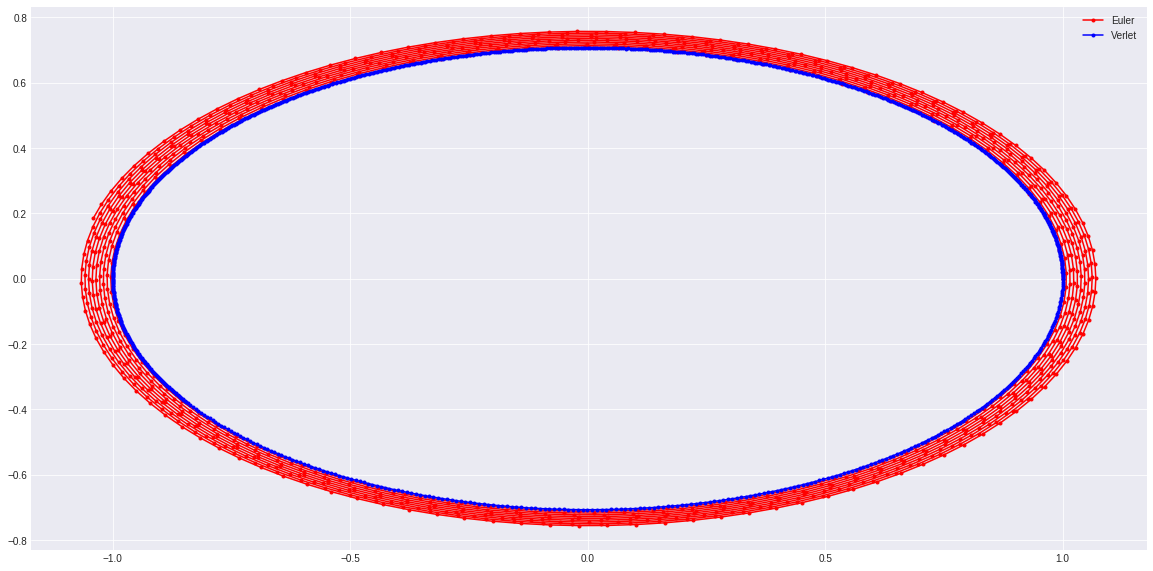

In [7]:
plt.figure(figsize = (20,10))
plt.plot(rE[:,0], rE[:,1], marker = '.', c= 'r', label = 'Euler');
plt.plot(rV[:,0], rV[:,1] , marker = '.', c= 'b', label = 'Verlet')

plt.legend()

In [8]:
def energy(r, v):
    m1 = 1
    m2 = 1
    G = 1
    E = []
    Ek_ = []
    Ep_ = []
    angular_momentum = []
    for i in range(len(r)):
        Ek = 0.5*m1*np.linalg.norm(v[i,:])**2
        Ek_.append(Ek)
        Ep = - G*m1*m2/np.linalg.norm(r[i,:])
        Ep_.append(Ep)
        E.append(Ek+Ep)
        angular_momentum.append(np.cross(r[i,:], v[i,:]))
    return E, Ek_, Ep_, angular_momentum

In [18]:
E, K, U, L = energy(rV, vV)
Ee, Ke, Ue, LLe = energy(rE, vE)


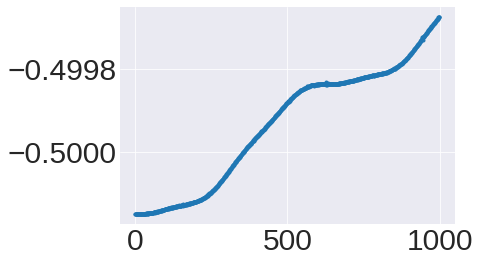

In [19]:
plt.plot(E, '.')

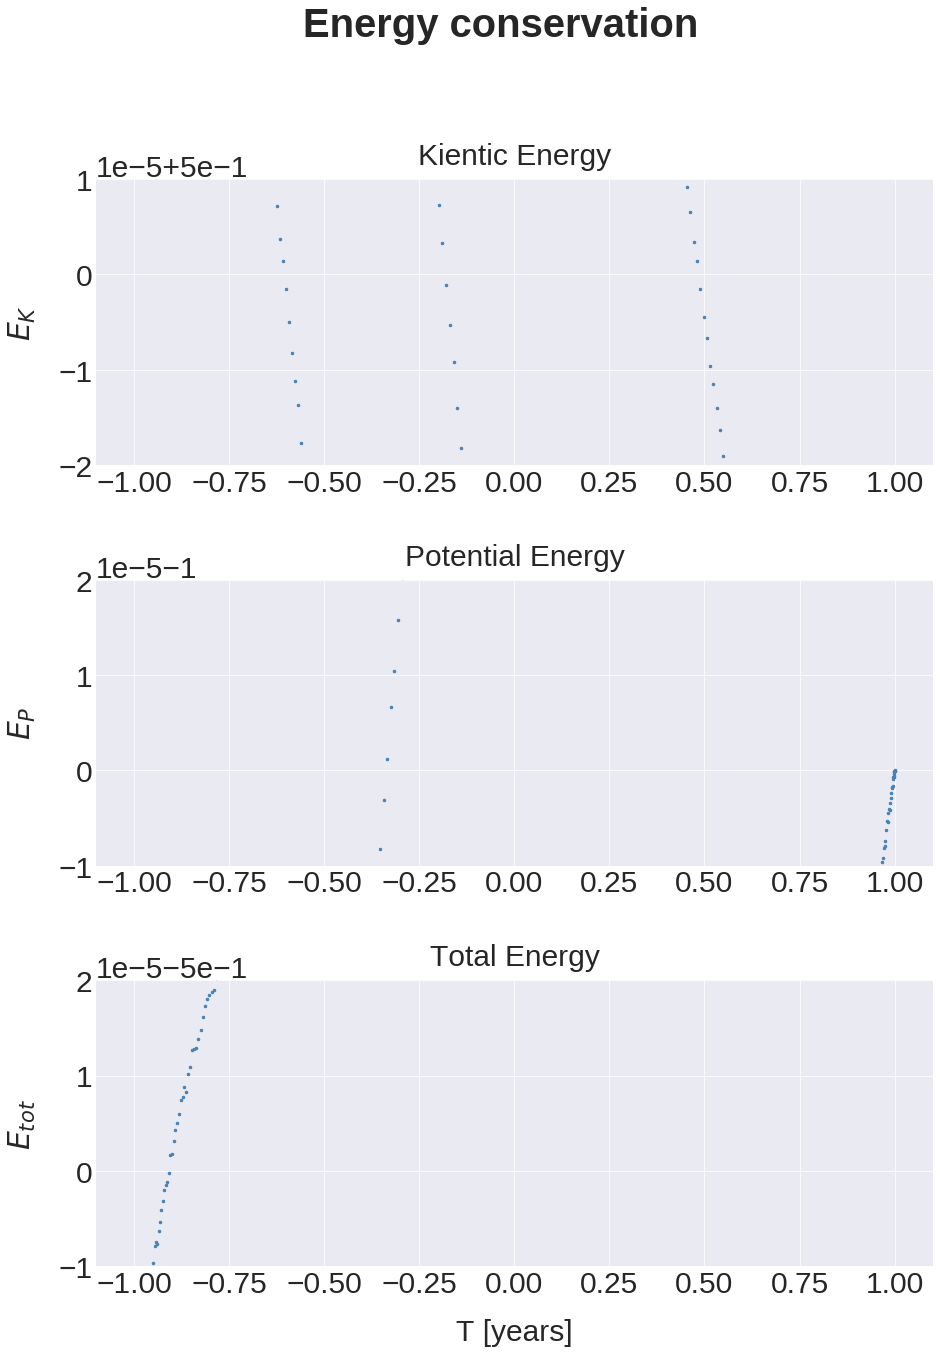

In [20]:
fsize = 30
fig, axs = plt.subplots(3, 1, figsize = (15,20))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Energy conservation\n',y=1, fontsize=fsize +10, fontweight='bold')

axs[0].set_title('Kientic Energy', fontsize = fsize, pad = 15)
axs[0].plot(tV, K,'.', ms = 5 , label = 'L40', c = c2)
axs[1].plot(tV,U,'.', ms = 5 , label = 'L40', c = c2)
axs[2].plot(tV,E,'.', ms = 5 , label = 'L40', c = c2)

axs[0].tick_params(labelsize=fsize)
axs[1].tick_params(labelsize=fsize)
axs[2].tick_params(labelsize=fsize)


axs[1].set_title('Potential Energy', fontsize = fsize, pad = 15)
axs[2].set_title('Total Energy', fontsize = fsize, pad = 15)
axs[2].set_xlabel('T [years]', fontsize = fsize, labelpad = 20)
axs[0].set_ylabel('$E_{K}$', fontsize = fsize, labelpad = 20)
axs[1].set_ylabel('$E_{P}$', fontsize = fsize, labelpad = 20)
axs[2].set_ylabel('$E_{tot}$', fontsize = fsize, labelpad = 20)

axs[0].ticklabel_format(style='sci',scilimits=(-1,1), axis='y')
axs[0].set_ylim([-2e-5+0.5, 1e-5+0.5])


axs[1].ticklabel_format(style='sci',scilimits=(-1,1), axis='y')
axs[1].set_ylim([-1 - 1e-5, -1+2e-5])

axs[2].ticklabel_format(style='sci',scilimits=(-1,1), axis='y')
axs[2].set_ylim([-0.5 - 1e-5, -0.5+2e-5])


matplotlib.rc('font', size=fsize)
plt.subplots_adjust(hspace = 0.4)
#plt.savefig('../Paper/Figures/EC.png')

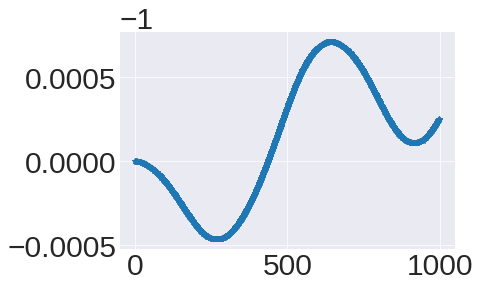

In [21]:
plt.plot(U, '*')

In [22]:
LL = np.linalg.norm(L, axis = 1)

<Figure size 2160x720 with 0 Axes>

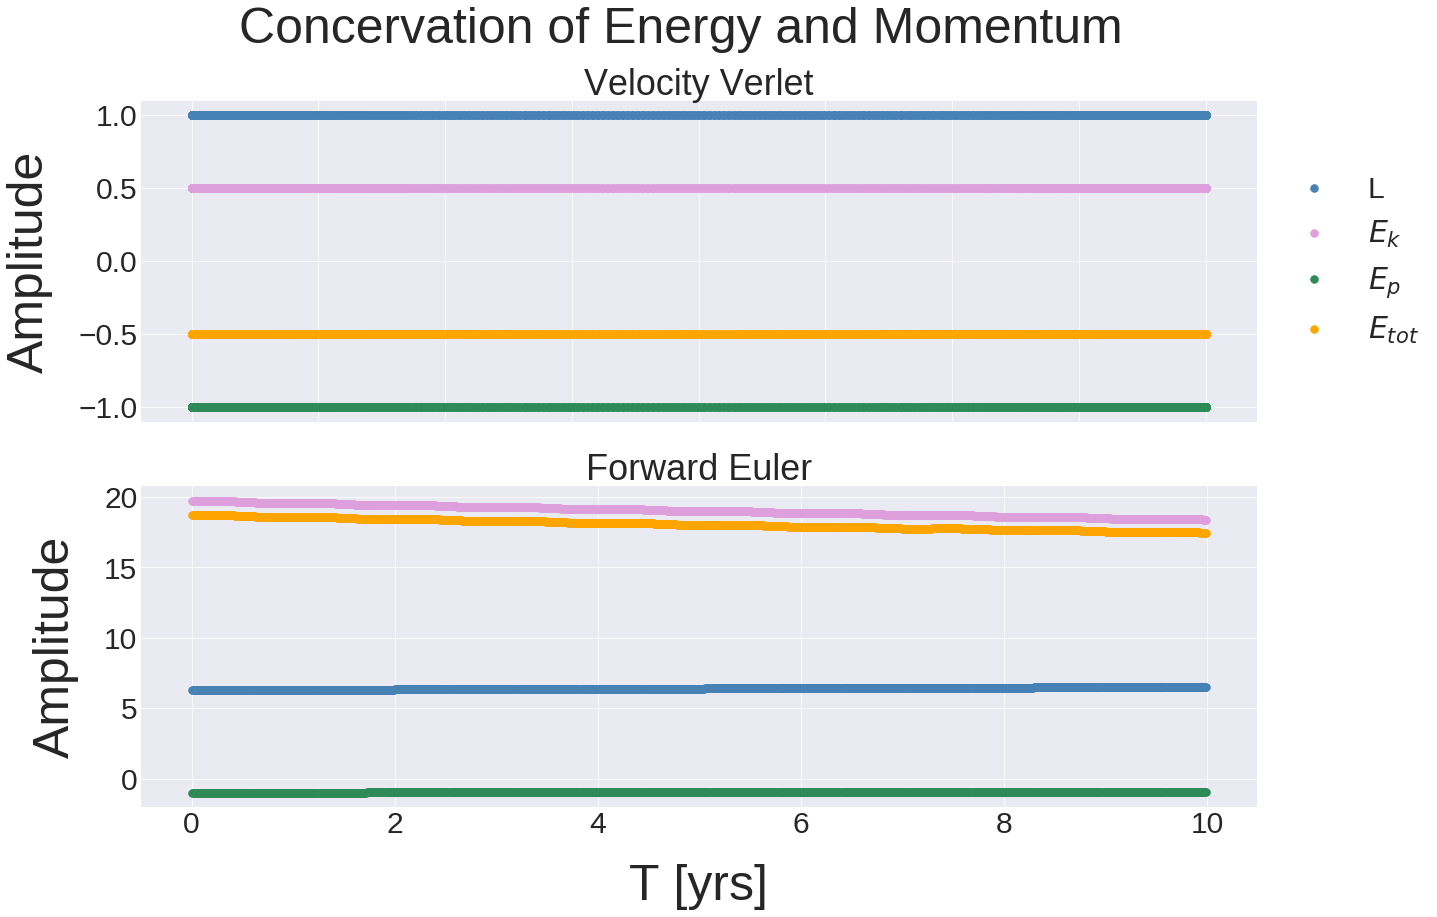

In [30]:
plt.figure(figsize = (30,10))
fsize = 50

fig, axs = plt.subplots(2, 1, figsize = (20,13))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Concervation of Energy and Momentum', fontsize = fsize)

size_= 15

axs[0].plot(tV, LL, '.', ms = size_, label = 'L', c = c2)
axs[0].plot(tV, K, '.', ms = size_, label = '$E_k$', c = c3)
axs[0].plot(tV, U, '.', ms = size_, label = '$E_p$', c = c4)
axs[0].plot(tV, E, '.', ms = size_, label = '$E_{tot}$', c = c5)
axs[0].set_ylabel('Amplitude', fontsize = fsize, labelpad = 25)
axs[1].set_xlabel('T [yrs]', fontsize = fsize,  labelpad = 25)
axs[1].set_ylabel('Amplitude', fontsize = fsize, labelpad = 25)
axs[0].set_yticks([])

axs[0].title.set_text('Velocity Verlet')
axs[1].plot(tE, LLe2, '.', ms = size_, label = 'L', c = c2)
axs[1].plot(tE, Ke, '.', ms = size_, label = '$E_k$', c = c3)
axs[1].plot(tE, Ue, '.', ms = size_, label = '$E_p$', c = c4)
axs[1].plot(tE, Ee, '.', ms = size_, label = '$E_{tot}$', c = c5)
axs[1].title.set_text('Forward Euler')
for ax in axs.flat:
    ax.label_outer()

axs[0].set_yticks([-1,-0.5,0,0.5,1])

#plt.legend(fontsize = fsize, loc = 'best')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../Paper/Figures/EC.png')

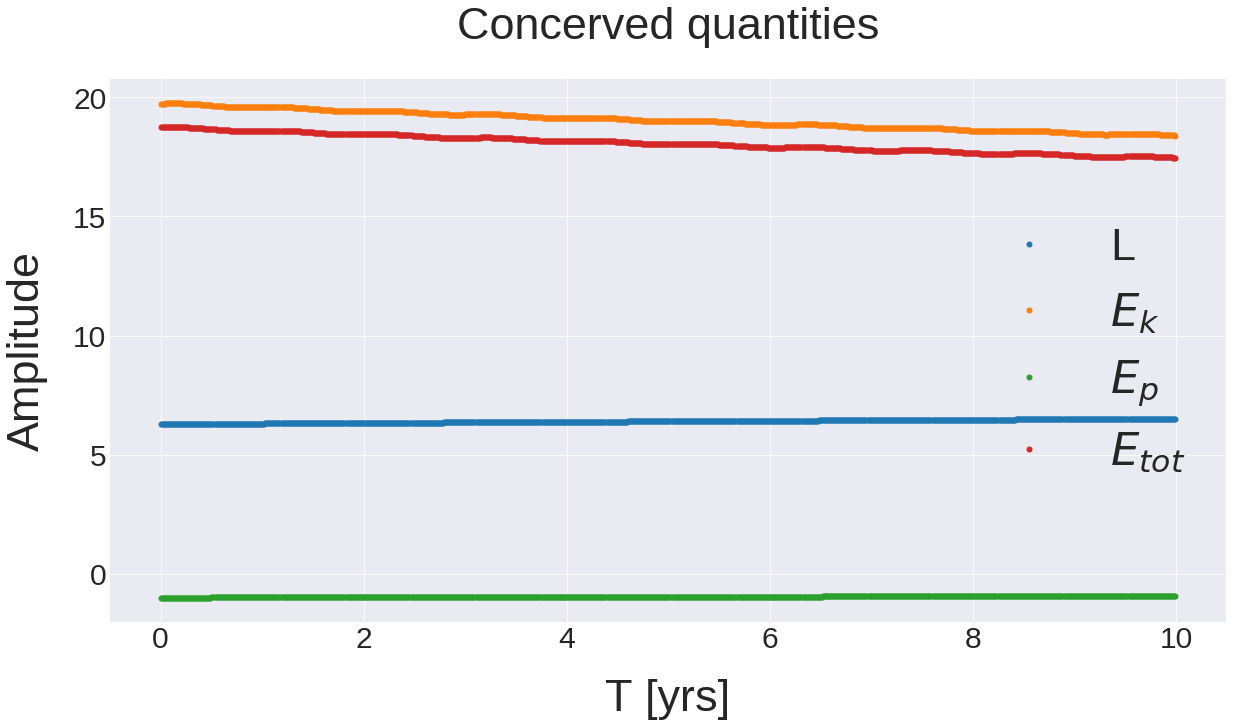

In [24]:
LLe2 = np.linalg.norm(LLe, axis = 1)
plt.figure(figsize = (20,10))
fsize = 45

plt.plot(tE, LLe2, '.', ms = 10, label = 'L')
plt.plot(tE, Ke, '.', ms = 10, label = '$E_k$')
plt.plot(tE, Ue, '.', ms = 10, label = '$E_p$')
plt.plot(tE, Ee, '.', ms = 10, label = '$E_{tot}$')
plt.ylabel('Amplitude', fontsize = fsize, labelpad = 25)
plt.xlabel('T [yrs]', fontsize = fsize,  labelpad = 25)

plt.title('Concerved quantities', pad = 40, fontsize = fsize)
#plt.yticks([-1,-0.5,0,0.5,1])

plt.legend(fontsize = fsize, loc = 'best')
plt.savefig('../Paper/Figures/EC.png')

In [ ]:
np.std(E)

In [ ]:
euler = np.array([0.307972, 0.30242,  0.289789, 0.300386, 0.300009, 0.302913, 0.295089, 0.289944, 0.300629, 0.30462])
verlot = np.array([0.31758, 0.315338, 0.294726, 0.311239, 0.319282, 0.316143, 0.306835, 0.305286, 0.321925, 0.330477])

In [ ]:
np.mean(euler)

In [ ]:
np.std(euler)

In [ ]:
np.mean(verlot)

In [ ]:
np.std(verlot)

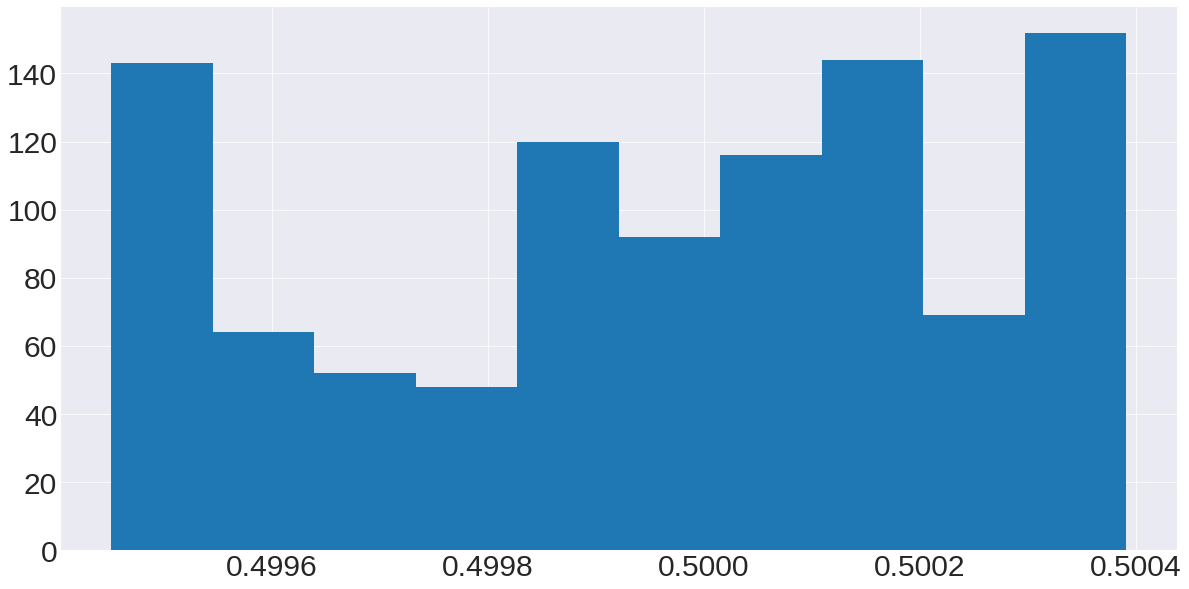

In [142]:
plt.figure(figsize = (20,10))
plt.hist(K)
#plt.hist(Ke)
plt.show()